# David Kartchner
## First Attempt at tensorflow using online tutorial
### CS 501 R

In [1]:
# Copyright 2015 The TensorFlow Authors. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================

"""A very simple MNIST classifier.
See extensive documentation at
http://tensorflow.org/tutorials/mnist/beginners/index.md
"""
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

# Import data
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

flags = tf.app.flags
FLAGS = flags.FLAGS
flags.DEFINE_string('data_dir', '/tmp/data/', 'Directory for storing data')

mnist = input_data.read_data_sets(FLAGS.data_dir, one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [ ]:
sess = tf.InteractiveSession()

# Create list to hold our accuracy measures at each iteration
accuracy = []

# Create the model with better initialized variables
x = tf.placeholder(tf.float32, [None, 784])
W1 = tf.Variable(tf.random_normal([784, 200], stddev=.01), name = "W1")
b1 = tf.Variable(tf.constant(0.01, shape=[200]))


# Create a new ReLU layer
x1 = tf.nn.relu(tf.matmul(x,W1) + b1)
W2 = tf.Variable(tf.random_normal([200, 10], stddev=.01), name = "W2")
b2 = tf.Variable(tf.constant(0.01, shape=[10]))
y = tf.nn.softmax(tf.matmul(x1, W2) + b2)

# Define loss and optimizer
y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
acc = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Train
tf.initialize_all_variables().run()

In [11]:
n_epochs = 1000
for i in xrange(n_epochs):
    if i%100==0:
        print(i)
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys} )
    accuracy.append(sess.run(acc, feed_dict={x: mnist.test.images, y_: mnist.test.labels})) 

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900


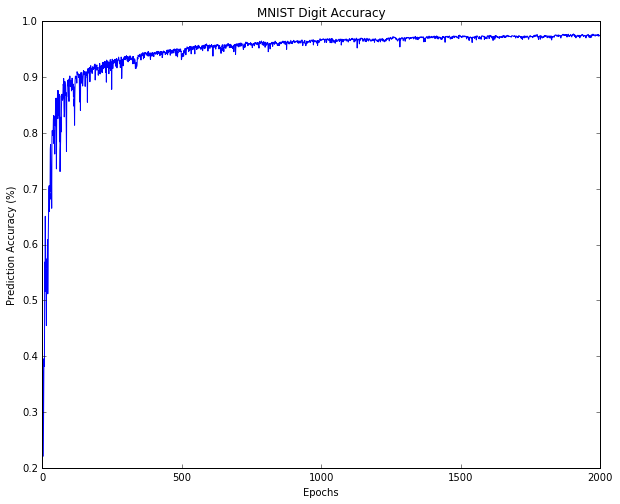

Final Accuracy: 0.9748


In [9]:
plt.figure(figsize=(10,8))
plt.title("MNIST Digit Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Prediction Accuracy (%)")
plt.plot(range(n_epochs), accuracy)
plt.show()

print("Final Accuracy:",(acc.eval({x: mnist.test.images, y_: mnist.test.labels})))